In [12]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm

plt.style.use('seaborn')
%matplotlib inline

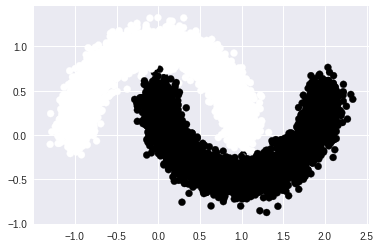

In [13]:
X,y = datasets.make_moons(n_samples=10000, 
                          shuffle=True, 
                          noise=0.1, 
                          random_state=1234)
Y = np.reshape(y, (len(y),1))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [14]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.l1 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out = self.sigmoid(self.l1(x))
        return out   


In [15]:
model = NeuralNetwork()

In [16]:
inputs = torch.tensor(X, dtype=torch.float)
labels = torch.tensor(y, dtype=torch.float)

In [17]:
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [18]:
#store all the loss values
losses = []

In [19]:
for epoch in tqdm(range(10000)):
    y_pred = model(inputs)
    loss = criterion(y_pred, labels)
    losses.append(loss)
    if not epoch%500: print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  0%|          | 0/10000 [00:00<?, ?it/s]/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([10000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
  1%|          | 122/10000 [00:00<00:16, 602.98it/s]

0 0.6730988025665283


  6%|▌         | 572/10000 [00:00<00:13, 697.85it/s]

500 0.2506553828716278


 11%|█▏        | 1141/10000 [00:01<00:12, 722.03it/s]

1000 0.2506555914878845


 16%|█▋        | 1633/10000 [00:02<00:11, 724.50it/s]

1500 0.25065556168556213


 21%|██        | 2106/10000 [00:02<00:11, 716.71it/s]

2000 0.25065556168556213


 26%|██▌       | 2615/10000 [00:03<00:10, 728.45it/s]

2500 0.25065553188323975


 31%|███       | 3101/10000 [00:04<00:09, 733.12it/s]

3000 0.25065556168556213


 37%|███▋      | 3655/10000 [00:04<00:08, 732.65it/s]

3500 0.25065553188323975


 41%|████      | 4063/10000 [00:05<00:08, 729.18it/s]

4000 0.25065475702285767


 46%|████▌     | 4620/10000 [00:06<00:07, 731.16it/s]

4500 0.2506560981273651


 51%|█████     | 5108/10000 [00:06<00:06, 730.95it/s]

5000 0.25065532326698303


 56%|█████▌    | 5577/10000 [00:07<00:06, 729.95it/s]

5500 0.2506555914878845


 61%|██████    | 6117/10000 [00:08<00:05, 729.19it/s]

6000 0.25065553188323975


 66%|██████▌   | 6602/10000 [00:09<00:04, 729.63it/s]

6500 0.25065577030181885


 71%|███████   | 7075/10000 [00:09<00:04, 730.76it/s]

7000 0.2506561577320099


 76%|███████▌  | 7605/10000 [00:10<00:03, 727.10it/s]

7500 0.2506559193134308


 81%|████████  | 8102/10000 [00:11<00:02, 731.70it/s]

8000 0.25065580010414124


 86%|████████▌ | 8596/10000 [00:11<00:01, 731.89it/s]

8500 0.2506555914878845


 91%|█████████ | 9093/10000 [00:12<00:01, 732.12it/s]

9000 0.2506556212902069


 96%|█████████▌| 9582/10000 [00:13<00:00, 733.19it/s]

9500 0.25065526366233826


100%|██████████| 10000/10000 [00:13<00:00, 732.91it/s]


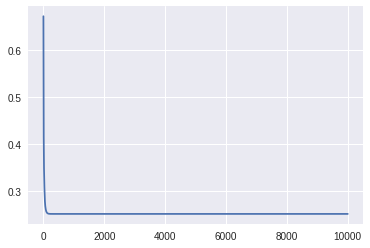

In [20]:
plt.plot(losses)

tensor([[0.9976]], grad_fn=<SigmoidBackward>)


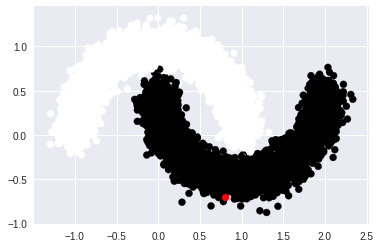

In [39]:
test = torch.randn(1,2, dtype=torch.float)
print(model.forward(test))
test2 = test.cpu().numpy()
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(test2[0][0], test2[0][1],c='red')
plt.show()